# Predicting heart disease using machine learning

*This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.*

*It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.*

**This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.**

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

in a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

The original data came from the Cleavland data from UCI Machine Learning Repository 
[Link](https://archive.ics.uci.edu/dataset/45/heart+disease)

There is also a version of it on Kaggle.
[Link](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patien has heart disease during the proof of concept, we'll persue the project.

## 4. Features

**create a data dictionary**

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
 anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
 * 0: Nothing to note
 * 1: ST-T Wave abnormality
   * can range from mild symptoms to severe problems
   * signals non-normal heart beat
 * 2: Possible or definite left ventricular hypertrophy
   * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 * colored vessel means the doctor can see the blood passing through
 * the more blood movement the better (no clots)
13. thal - thalium stress result
 * 1,3: normal
 * 6: fixed defect: used to be defect but ok now
 * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools 

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

* Pandas for data analysis
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization
* Scikit-Learn for machine learning modelling and evaluation

In [65]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Tue Apr 30 13:54:10 2024


## Load Data

In [66]:
df = pd.read_csv("./heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (Exploratory Data Anlysis or EDA)

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [67]:
# first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
# first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


value_counts() allows you to show how many times each of the values of a categorical column appear.

In [69]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since these two values are close to even, our target column can be considered balanced. An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.



In [70]:
# Normalized value counts
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

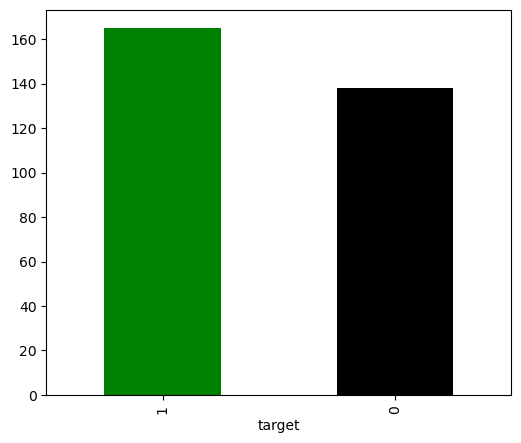

In [71]:
# plot the value counts with a bar graphic
df.target.value_counts().plot(kind="bar", color=["green", "black"], figsize=(6,5));

`df.info` shows a quick insight to the number of missing values you have and what type of data you're working with

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


in our case there are no missing values and all of our columns are numerical in type

Another way to get some quick insights on your dataframe is to use `df.describe()`. describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [73]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Gender

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [74]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [75]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable 
> if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, 
> if the participant is male, 50% of the time he will have heart disease.


> > Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

## Making our crosstab visual

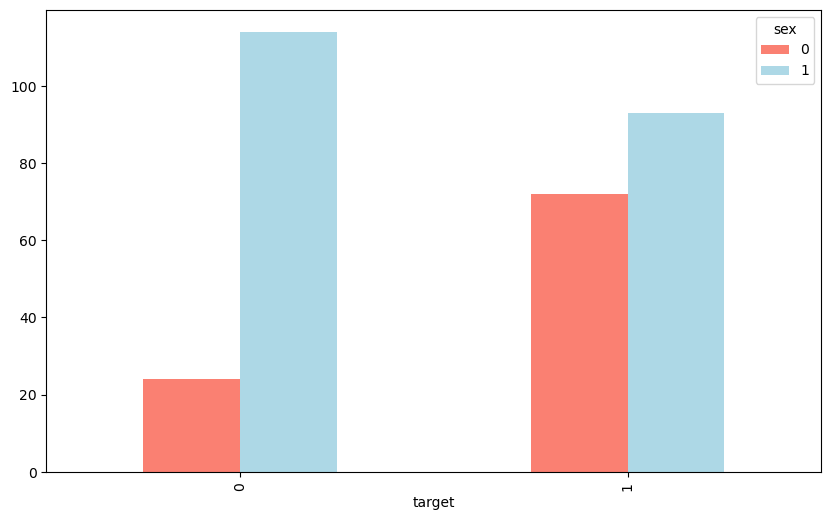

In [76]:
# create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);

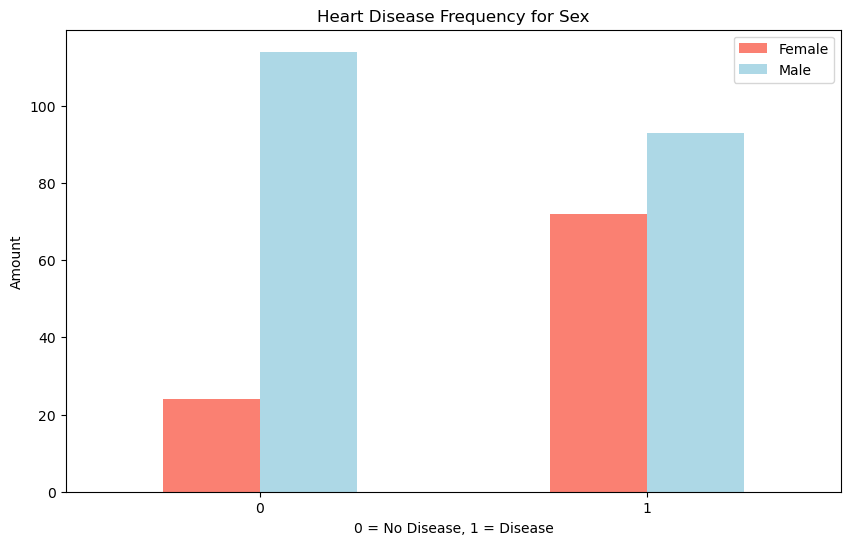

In [77]:
# create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);

# let's add some attribute to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

## Age vs Max Heart rate for Heart Disease

le'ts compare `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

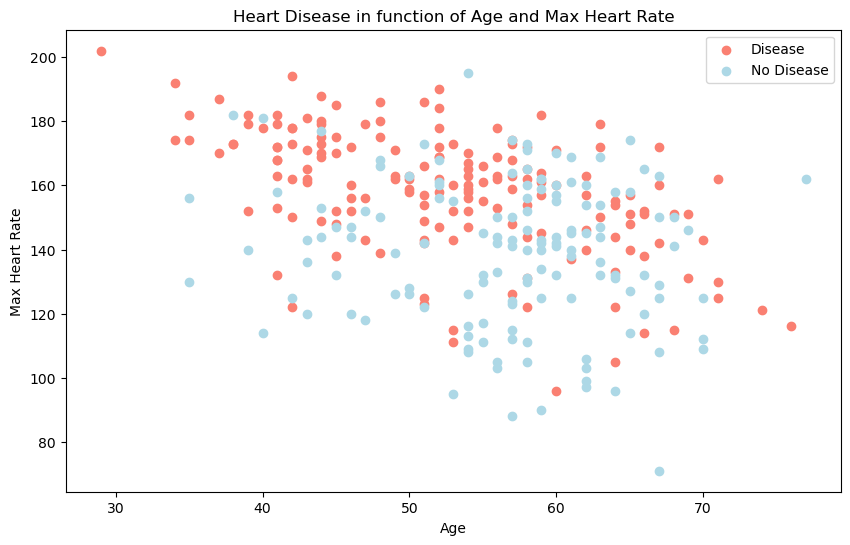

In [78]:
# create another figure
plt.figure(figsize=(10,6))

# start with positive example (target = 1)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon") # define it as a scatter figure

# now for the negative ones, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue") #axis always come as (x,y)

# add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

What can we infer from this?

It seems **the younger someone is, the higher their max heart rate** 
(dots are higher on the left of the graph) and 

**the older someone is, the more green dots there are**. But this may be because 

*there are more dots all together on the right side of the graph (older participants)*.

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age distribution.

<Axes: ylabel='Frequency'>

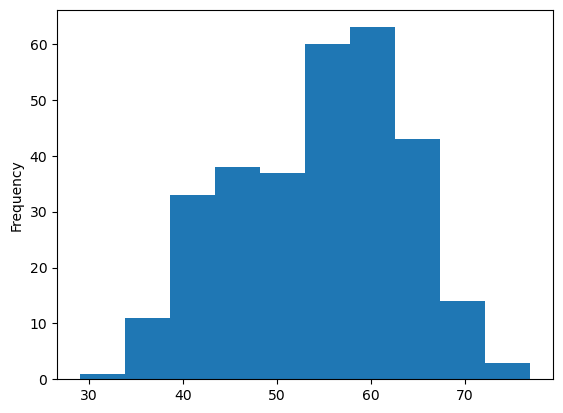

In [79]:
# create a hist of the age distribution
df.age.plot.hist()

In [80]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


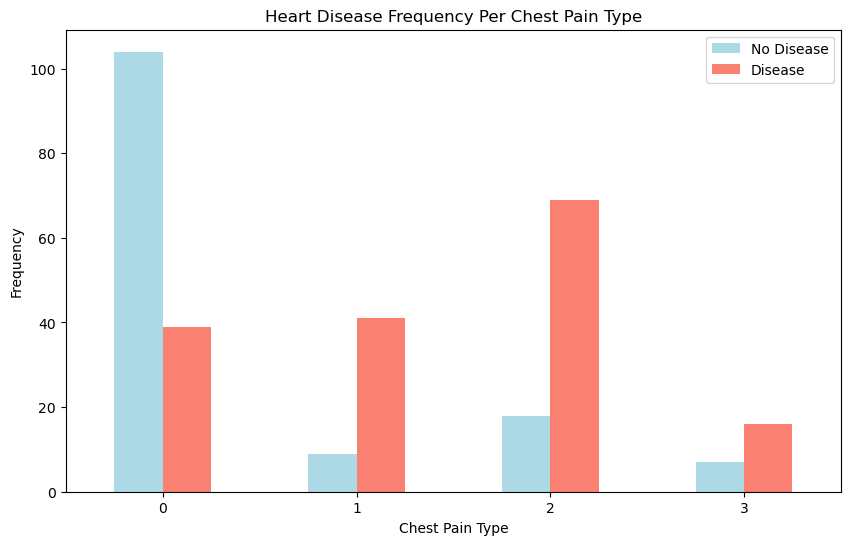

In [81]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

#add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

Remember from our data dictionary what the different levels of chest pain are.

3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
    

It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

## Correlation between independent variables

this may give an idea of which independent variables may or may not have an impact on our target variable.

will create a **correlation matrix** : how related each variable is to the other (`df.corr()`)

In [82]:
# find the correlation between independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


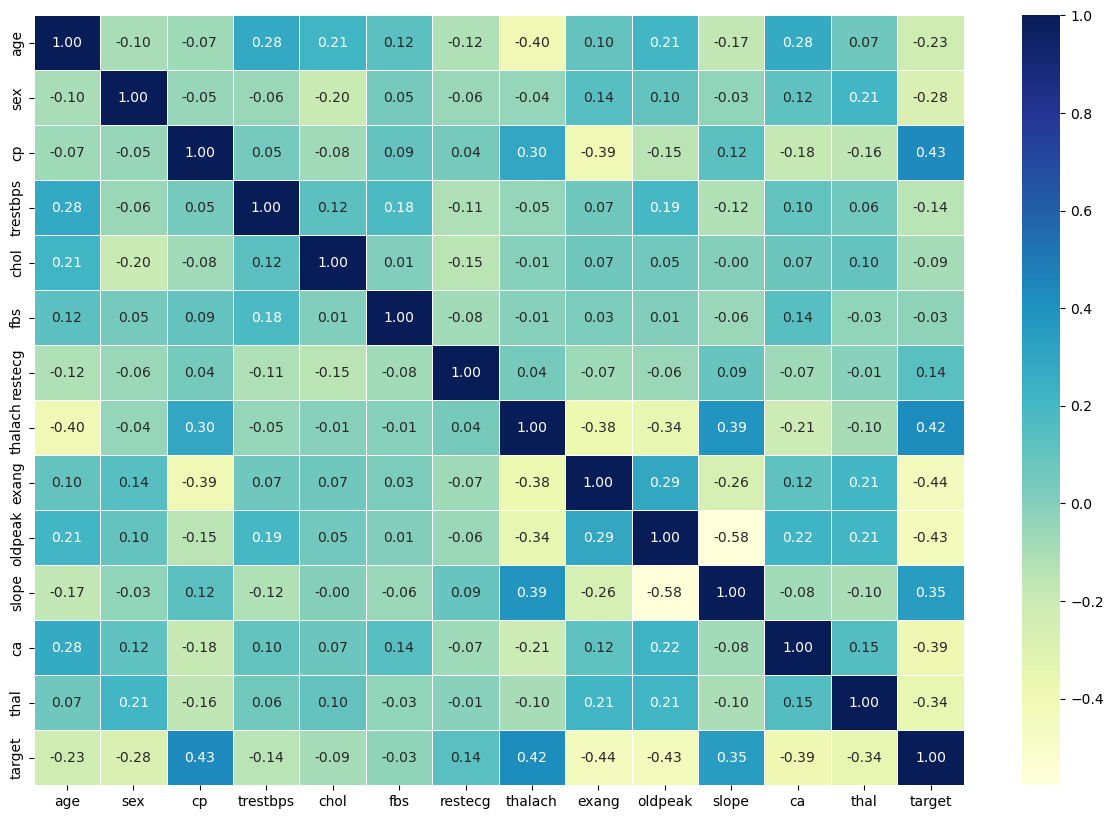

In [83]:
#make it a little bit more readable
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");


A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 5. Modeling

our problem:

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

evaluation metric:

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

let's get our data ready

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
x = df.drop("target", axis=1)
y = df.target.values

In [86]:
# Independent variables 
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [87]:
# Targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Training and test split

In [88]:
# Random seed for reproducibility

np.random.seed(42)

#split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

80% of your data to train on and the other 20% to test on.

In [89]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [90]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

 we're using 242 samples to train on.

In [91]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [92]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 61)

we've got 61 examples we'll test our model on

## Model choices 

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbours - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, model.fit(X_train, y_train) and for scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [93]:
#put models in dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

In [94]:
#create a function to fit and score all models together
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine learning models.
    """
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)

    return model_scores

In [95]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Model comparison

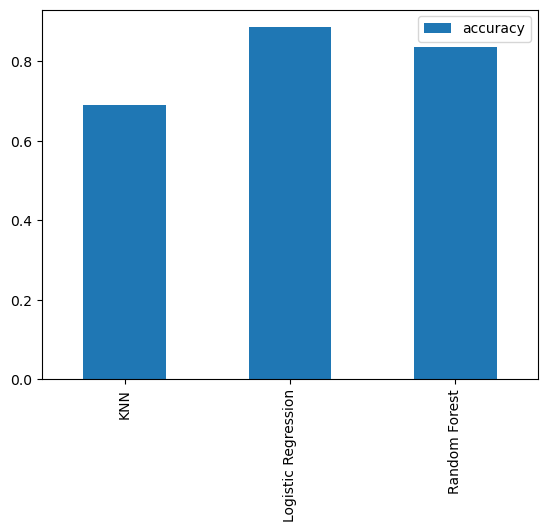

In [96]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Logistic Regression performs best

## Hyperparameter tuning and cross-validation

* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning KNN

In [98]:
# tuning KNN

train_scores = []
test_scores = []

# create a list of different values fon n_neighbors

neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [99]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [100]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


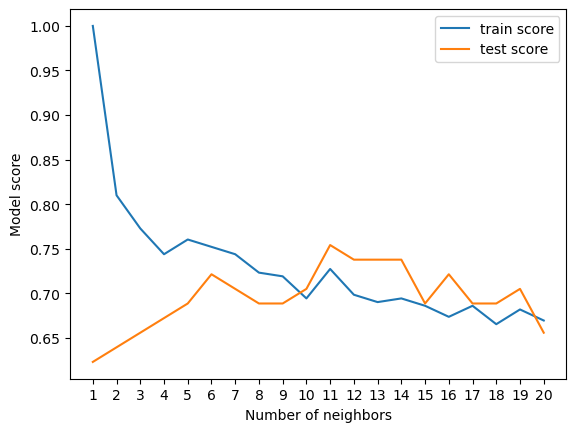

In [105]:
plt.plot(neighbors, train_scores, label="train score")
plt.plot(neighbors, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

`n_neighbors = 11` looks good

`LogisticRegression` and `RandomForestClassifier` still seems better so we're focusing on those two

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

### Tuning models with `RandomizedSearchCV`

(CV stand for cross validation, 5-folds cross validation)

let's create a hyperparameter grid for each and then test them out 

In [107]:
#tuning LG and RF

# Different LogisticRegression hyperparamteres 
log_reg_grid = {"C": np.logspace(-4,4,20), 
                # C = regola la regolarizzazione del modello
                # valori ALTI = regolarizzazione più debole consentendo al modello di 
                # adattarsi meglio ai dati di addestramento. 
                # valori BASSI = aumentano la forza di regolarizzazione , quindi il
                # modello fa più fatica ad adattarsi può essere utile per l'overfitting

                # è un parametro che controlla quanto desideri penalizzare 
                # i coefficienti del modello per ridurre l'overfitting
                "solver": ["liblinear"]}
                # SOLVER = specifica l'algoritmo utilizzato per risolvere il problema
                # di ottimizzazione
                # SI SCEGLIE IN BASE ALLE DIMENSIONI DEL SET DI DATI
                # liblinear è una buona scelta per set di dati di piccole e medie dimensioni

# Different RandomForestClassifier hyperparameters 
rf_grid = {"n_estimators": np.arange(10,1000,50), #perché range? RandomSearchCV lo consiglia altamente quando si ha a che fare con parametri continui
           # numeri di alberi decisionali
           # Un numero più elevato di alberi può migliorare la performance del modello, 
           # ma aumenta anche il tempo di addestramento.
           "max_depth": [None, 3,5,10],
           # profondità di ciascun albero decisionale
           # una profondità maggiore può portare a overfitting, ma può anche catturare relazioni 
           # complesse nei dati
           "min_samples_split": np.arange(2,20,2),
           # specifica il numero minimo di campioni per suddividere un nodo interno
           # aumentare questo valore può ridurre il rischio di overfitting
           # poichè generalizza i modelli (più campioni per suddividere un nodo)
           "min_samples_leaf": np.arange(1,20,2)}
            # specifica il numero minimo di campioni che devono essere presenti in un nodo "foglia"
            # dell'albero decisionale. 
            # controlla la dimensione minima consentita per una foglia dell'albero durante la costruzione
            # una foglia è un nodo terminale dell'albero che NON viene ulteriormente diviso
            # ogni foglia rappresenta una decisione o una predizione finale che il modello prende
            # in base alle caratteristiche dei dati.

Now we've use `RandomizedSearchCV` to try and tune our `LogisticRegression` model

In [113]:
# RandomizedSearchCV è un metodo per la ricerca degli iperparametri che esplora
# casualmente una griglia di possibili combinazioni di iperparametri.

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5, # + è alto + tempo impiega il modello
                                n_iter=20,
                                verbose=1) # livello di dettaglio degli output
# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [114]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [115]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

we'll do the same for `RandomForestClassifier`

In [118]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=1)

rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [119]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [120]:
rs_rf.score(x_test, y_test)

0.8688524590163934

since `LogisticRegression` is pulling out in front, we'll try tuning it further with `GridSearchCV`

## Tuning a model with GridSearchCV

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing n_iter combinations, `GridSearchCV` will test every single possible combination.



In short:

* `RandomizedSearchCV` - tries n_iter combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

In [121]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=1)

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [123]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [124]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

Note: If there are a large amount of hyperparameters combinations in your grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

## Evaluating a classification model, beyond accuracy

we want:

* ROC curve and AUC score - RocCurveDisplay()
    *Note: This was previously sklearn.metrics.plot_roc_curve(), as of Scikit-Learn version 1.2+, it is sklearn.metrics.RocCurveDisplay().
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

### prima di tutto quando si valuta un modello, bisogna comparare le predizioni del modello allenato e i valori veri 

In [128]:
# make prediction on test data
y_preds = gs_log_reg.predict(x_test)

In [129]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [130]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# ROC Curve and AUC Scores

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

* A false positive in this case occurs when the person tests positive, but does not actually have the disease. 
* A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.



Reading the documentation on the RocCurveDisplay function we can see it has a class method called `from_estimator(estimator, X, y)` as inputs.

Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.

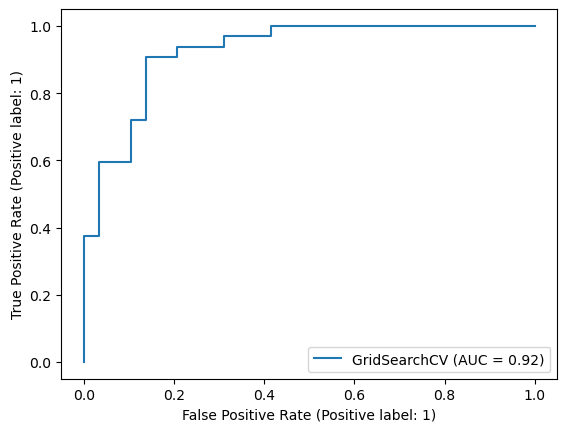

In [132]:
# I already imported RocCurveDisplay at the beginning of the notebook

RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=x_test,
                               y=y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.92. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

# Confusion matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [133]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


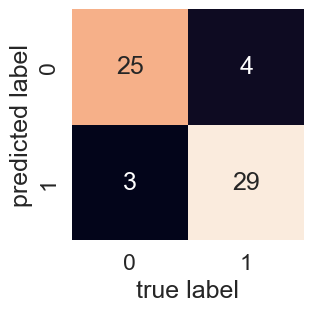

In [147]:
# already imported seaborn at the beginning of the notebook


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, #annotate the boxes with the numbers
                     cbar=False) #toglie la barra laterale 
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test,y_preds)

You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

# Classification report

In [148]:
# show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [150]:
# check best hyperparameters 

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [151]:
# already imported cross_val_score at the beginning of the notebook
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

### cross-validated ACCURACY score

In [152]:
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [153]:
# visto che ce ne sono cinque, prenderemo la media
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

### cross-validated PRECISION score

In [159]:
cv_precision = np.mean(cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring="precision")) #np.mean così faccio sempre la media dei cinque valori
cv_precision


0.8215873015873015

### cross-validated RECALL score

In [160]:
cv_recall = np.mean(cross_val_score(clf,
                                   x,
                                   y,
                                   cv=5,
                                   scoring="recall"))
cv_recall

0.9272727272727274

### cross-validated F1 score

In [162]:
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring="f1"))
cv_f1

0.8705403543192143

let's visualize the metrics 

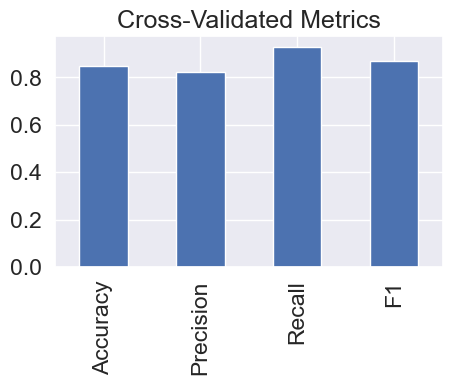

In [175]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False, figsize=(5,3));

## Feature importance

which features contributing most to the outcomes of the model?

in our case: which charateristics contribute most to a model predicting whether someone has heart disease or not.

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the `coef_` attribute is the coefficient of the features in the decision function.

In [178]:
# fit an instance of LogisticRegression
clf.fit(x_train, y_train);

In [179]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

In [181]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

# zip prende due liste e le combina elemento per elemento in tuple
# quindi prende una colonna del dataframe e il coefficiente associato dal modello
                                          

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

<Axes: title={'center': 'Feature Importance'}>

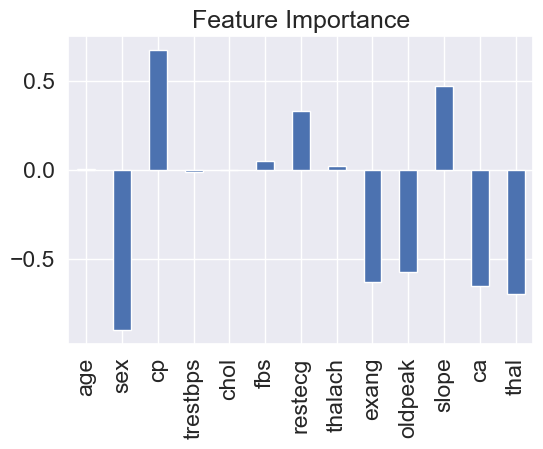

In [185]:
# visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(6,4))

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

In [186]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

* Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
* Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
* Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

# 6. Experimentation

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific data set doesn't hit the target we set ourselves.

* Could you collect more data?

* Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.

* Could you improve the current models (beyond what we've done so far)?

* If your model is good enough, how would you export it and share it with others?
